In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/BDA_project/df_ver0.csv') #엑셀 파일로 저장했을 경우
# df = pd.read_csv('train.csv') #csv 파일로 저장했을 경우

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 적용하기

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df

,Unnamed: 0,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,0,0,2019-10-15,405136001,7997025,360-1,제주대학교입구,06시,266.000000,제대마을,24,Tuesday,0.090226,11.083333,morning
1,1,1,2019-10-15,405136001,7997025,360-1,제대마을,06시,333.265436,제대아파트,36,Tuesday,0.108108,9.250000,morning
2,2,2,2019-10-15,405136001,7997025,360-1,제대아파트,06시,420.903308,제주대학교,40,Tuesday,0.096386,10.375000,morning
3,3,3,2019-10-15,405136001,7997025,360-1,남국원(아라방면),06시,578.000000,제주여자중고등학교(아라방면),42,Tuesday,0.072664,13.761905,morning
4,4,4,2019-10-15,405136001,7997025,360-1,도호동,07시,322.581998,은남동,64,Tuesday,0.171123,5.843750,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,210452,2019-10-28,405328102,7983486,281-2,비석거리,21시,526.655462,삼아아파트,96,Monday,0.181818,5.500000,evening
210453,210453,210453,2019-10-28,405328102,7983486,281-2,동문로터리,21시,280.000000,매일올레시장 7번입구,50,Monday,0.178571,5.600000,evening
210454,210454,210454,2019-10-28,405328102,7983486,281-2,서귀포시 구 버스터미널,21시,114.000000,아랑조을거리 입구,16,Monday,0.140351,7.125000,evening
210455,210455,210455,2019-10-28,405328102,7983486,281-2,아랑조을거리 입구,21시,219.256538,평생학습관,38,Monday,0.170404,5.868421,evening


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'route_id', 'vh_id', 'route_nm',
       'now_station', 'now_arrive_time', 'distance', 'next_station',
       'next_arrive_time', 'week', 's/m', 'm/s', 'time'],
      dtype='object')

In [ ]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,0,2019-10-15,405136001,7997025,360-1,제주대학교입구,06시,266.000000,제대마을,24,Tuesday,0.090226,11.083333,morning
1,1,2019-10-15,405136001,7997025,360-1,제대마을,06시,333.265436,제대아파트,36,Tuesday,0.108108,9.250000,morning
2,2,2019-10-15,405136001,7997025,360-1,제대아파트,06시,420.903308,제주대학교,40,Tuesday,0.096386,10.375000,morning
3,3,2019-10-15,405136001,7997025,360-1,남국원(아라방면),06시,578.000000,제주여자중고등학교(아라방면),42,Tuesday,0.072664,13.761905,morning
4,4,2019-10-15,405136001,7997025,360-1,도호동,07시,322.581998,은남동,64,Tuesday,0.171123,5.843750,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,비석거리,21시,526.655462,삼아아파트,96,Monday,0.181818,5.500000,evening
210453,210453,2019-10-28,405328102,7983486,281-2,동문로터리,21시,280.000000,매일올레시장 7번입구,50,Monday,0.178571,5.600000,evening
210454,210454,2019-10-28,405328102,7983486,281-2,서귀포시 구 버스터미널,21시,114.000000,아랑조을거리 입구,16,Monday,0.140351,7.125000,evening
210455,210455,2019-10-28,405328102,7983486,281-2,아랑조을거리 입구,21시,219.256538,평생학습관,38,Monday,0.170404,5.868421,evening


{'whiskers': [<matplotlib.lines.Line2D at 0x793a6c3e87f0>,
 'caps': [<matplotlib.lines.Line2D at 0x793a6c3e8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x793a6c3e8550>],
 'medians': [<matplotlib.lines.Line2D at 0x793a6c3e9270>],
 'fliers': [<matplotlib.lines.Line2D at 0x793a6c3e9510>],
 'means': []}

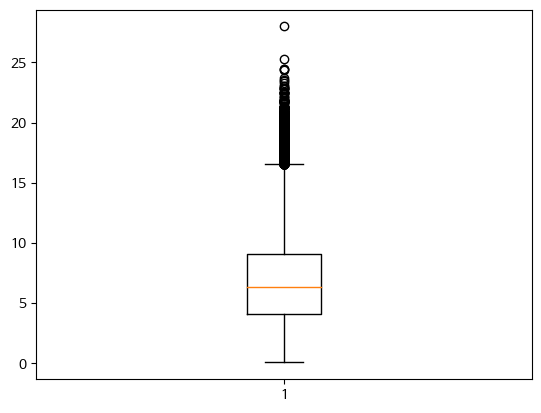

In [ ]:
plt.boxplot(df['m/s'])

In [ ]:
df['m/s'].describe()

count    210457.000000
mean          6.887892
std           3.529959
min           0.064694
25%           4.127273
50%           6.330000
75%           9.085938
max          27.978261
Name: m/s, dtype: float64

In [ ]:
q3 = df['m/s'].quantile(0.75)
q1 = df['m/s'].quantile(0.25)
q = (q3-q1)*1.5 +q3

In [ ]:
q

16.52393465909091

In [ ]:
df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,0,2019-10-15,405136001,7997025,360-1,제주대학교입구,06시,266.000000,제대마을,24,Tuesday,0.090226,11.083333,morning
1,1,2019-10-15,405136001,7997025,360-1,제대마을,06시,333.265436,제대아파트,36,Tuesday,0.108108,9.250000,morning
2,2,2019-10-15,405136001,7997025,360-1,제대아파트,06시,420.903308,제주대학교,40,Tuesday,0.096386,10.375000,morning
3,3,2019-10-15,405136001,7997025,360-1,남국원(아라방면),06시,578.000000,제주여자중고등학교(아라방면),42,Tuesday,0.072664,13.761905,morning
4,4,2019-10-15,405136001,7997025,360-1,도호동,07시,322.581998,은남동,64,Tuesday,0.171123,5.843750,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,비석거리,21시,526.655462,삼아아파트,96,Monday,0.181818,5.500000,evening
210453,210453,2019-10-28,405328102,7983486,281-2,동문로터리,21시,280.000000,매일올레시장 7번입구,50,Monday,0.178571,5.600000,evening
210454,210454,2019-10-28,405328102,7983486,281-2,서귀포시 구 버스터미널,21시,114.000000,아랑조을거리 입구,16,Monday,0.140351,7.125000,evening
210455,210455,2019-10-28,405328102,7983486,281-2,아랑조을거리 입구,21시,219.256538,평생학습관,38,Monday,0.170404,5.868421,evening


In [ ]:
outlier_all = df[df['m/s']>=q]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '365-22'),
  Text(1, 0, '201-11'),
  Text(2, 0, '201-12'),
  Text(3, 0, '201-13'),
  Text(4, 0, '201-14'),
  Text(5, 0, '201-15'),
  Text(6, 0, '201-16'),
  Text(7, 0, '201-17'),
  Text(8, 0, '201-18'),
  Text(9, 0, '201-21'),
  Text(10, 0, '201-22'),
  Text(11, 0, '201-24'),
  Text(12, 0, '201-26'),
  Text(13, 0, '201-27'),
  Text(14, 0, '281-1'),
  Text(15, 0, '281-2'),
  Text(16, 0, '360-1'),
  Text(17, 0, '365-21'),
  Text(18, 0, '360-12'),
  Text(19, 0, '360-2'),
  Text(20, 0, '360-7')])

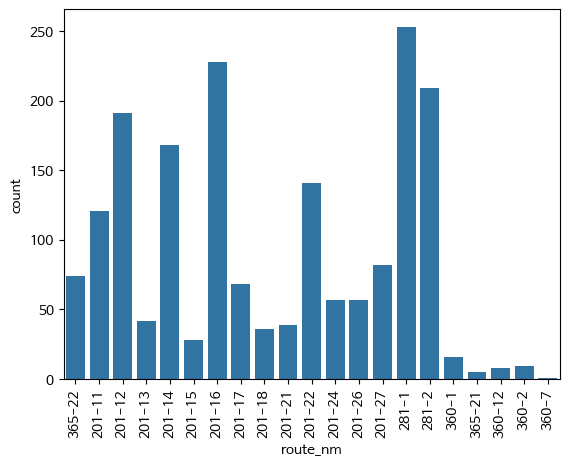

In [ ]:
sns.countplot(x = 'route_nm', data = outlier_all)
plt.xticks(rotation = 90)

In [ ]:
outlier_count = outlier_all.groupby(['route_nm'])['route_nm'].count().reset_index(name = 'count')

In [ ]:
outlier_count

,route_nm,count
0,201-11,121
1,201-12,191
2,201-13,42
3,201-14,168
4,201-15,28
5,201-16,228
6,201-17,68
7,201-18,36
8,201-21,39
9,201-22,141


In [ ]:
outlier_count['count'].describe()

count     21.000000
mean      87.285714
std       80.006339
min        1.000000
25%       28.000000
50%       57.000000
75%      141.000000
max      253.000000
Name: count, dtype: float64

In [ ]:
#75로 전처리
outlier_count[outlier_count['count']>=141]

,route_nm,count
1,201-12,191
3,201-14,168
5,201-16,228
9,201-22,141
13,281-1,253
14,281-2,209


6개의 노선들은 이상치를 처리하고 나머지 노선들은 이상치 드랍

In [ ]:
idx = df[((~df['route_nm'].isin(['201-12', '201-14', '201-16', '201-22', '281-1', '281-2'])) & (df['m/s'] >= q))].index
df.drop(idx, inplace =True)

In [ ]:
outlier_df = df[(df['route_nm'].isin(['201-12', '201-14','201-16', '201-22', '281-1', '281-2']) & (df['m/s'] >=q))].reset_index(drop=True, inplace=False)

In [ ]:
outlier_df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,7273,2019-10-15,405320112,7983005,201-12,고래왓,21시,364.000000,광대왓,22,Tuesday,0.060440,16.545455,evening
1,7333,2019-10-15,405320112,7983063,201-12,월정리 용천동,08시,339.451220,만장굴입구,14,Tuesday,0.045307,22.071429,morning
2,7670,2019-10-15,405320112,7983095,201-12,여 의 물,06시,571.000000,삼매봉,32,Tuesday,0.056042,17.843750,morning
3,7683,2019-10-15,405320112,7983095,201-12,망장포 입구,07시,552.708609,공천포,30,Tuesday,0.054348,18.400000,morning
4,7815,2019-10-15,405320112,7983095,201-12,신흥리취락구조,17시,254.000000,신흥교차로,14,Tuesday,0.055118,18.142857,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,209368,2019-10-28,405328102,7983415,281-2,하례환승정류장(하례리입구),20시,2005.621262,입석동,120,Monday,0.059821,16.716667,evening
1186,209406,2019-10-28,405328102,7983430,281-2,입석동,08시,2520.000000,한라산 둘레길,152,Monday,0.060317,16.578947,morning
1187,210076,2019-10-28,405328102,7983445,281-2,답다니,14시,489.000000,흙통,28,Monday,0.057260,17.464286,afternoon
1188,210152,2019-10-28,405328102,7983445,281-2,고래왓,22시,364.000000,광대왓,20,Monday,0.054945,18.200000,evening


In [ ]:
outlier_df_count = outlier_df.groupby(['now_station', 'next_station'])['now_station'].count().reset_index(name = 'count')
outlier_df_count

,now_station,next_station,count
0,LH아파트,광대왓,2
1,가흥동,한지동,3
2,견월교,교래입구,27
3,견월교,마방목지,13
4,계룡동,한동리,7
...,...,...,...
146,효돈농협하나로마트,맹살공원,1
147,흙통,답다니,39
148,흙통,오희준 공원,7
149,희진주유소,삼달교차로,2


In [ ]:
outlier_df_count['count'].describe()
#이상치 개수가 10개 넘는 now_station ->next_station 이상치 대체

count    151.000000
mean       7.880795
std       10.336942
min        1.000000
25%        1.000000
50%        4.000000
75%       10.000000
max       67.000000
Name: count, dtype: float64

In [ ]:
idx = df[((~df['route_nm'].isin(['201-12', '201-14', '201-16', '201-22', '281-1', '281-2'])) & (df['s/m'] >= q))].index
df.drop(idx, inplace =True)
df = df.reset_index(drop=True,inplace=False)

In [ ]:
df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,0,2019-10-15,405136001,7997025,360-1,제주대학교입구,06시,266.000000,제대마을,24,Tuesday,0.090226,11.083333,morning
1,1,2019-10-15,405136001,7997025,360-1,제대마을,06시,333.265436,제대아파트,36,Tuesday,0.108108,9.250000,morning
2,2,2019-10-15,405136001,7997025,360-1,제대아파트,06시,420.903308,제주대학교,40,Tuesday,0.096386,10.375000,morning
3,3,2019-10-15,405136001,7997025,360-1,남국원(아라방면),06시,578.000000,제주여자중고등학교(아라방면),42,Tuesday,0.072664,13.761905,morning
4,4,2019-10-15,405136001,7997025,360-1,도호동,07시,322.581998,은남동,64,Tuesday,0.171123,5.843750,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209809,210452,2019-10-28,405328102,7983486,281-2,비석거리,21시,526.655462,삼아아파트,96,Monday,0.181818,5.500000,evening
209810,210453,2019-10-28,405328102,7983486,281-2,동문로터리,21시,280.000000,매일올레시장 7번입구,50,Monday,0.178571,5.600000,evening
209811,210454,2019-10-28,405328102,7983486,281-2,서귀포시 구 버스터미널,21시,114.000000,아랑조을거리 입구,16,Monday,0.140351,7.125000,evening
209812,210455,2019-10-28,405328102,7983486,281-2,아랑조을거리 입구,21시,219.256538,평생학습관,38,Monday,0.170404,5.868421,evening


In [ ]:
q3 = df['m/s'].quantile(0.75)
q1 = df['m/s'].quantile(0.25)
q = (q3-q1)*1.5+q3

outlier_all = df[df['m/s']>=q]
outlier_df = outlier_all[outlier_all['route_nm'].isin(['201-12', '201-14', '201-16', '201-22', '281-1', '281-2'])]
outlier_df.reset_index(drop=False, inplace=False)
outlier_df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
7255,7273,2019-10-15,405320112,7983005,201-12,고래왓,21시,364.000000,광대왓,22,Tuesday,0.060440,16.545455,evening
7315,7333,2019-10-15,405320112,7983063,201-12,월정리 용천동,08시,339.451220,만장굴입구,14,Tuesday,0.045307,22.071429,morning
7652,7670,2019-10-15,405320112,7983095,201-12,여 의 물,06시,571.000000,삼매봉,32,Tuesday,0.056042,17.843750,morning
7665,7683,2019-10-15,405320112,7983095,201-12,망장포 입구,07시,552.708609,공천포,30,Tuesday,0.054348,18.400000,morning
7797,7815,2019-10-15,405320112,7983095,201-12,신흥리취락구조,17시,254.000000,신흥교차로,14,Tuesday,0.055118,18.142857,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208725,209368,2019-10-28,405328102,7983415,281-2,하례환승정류장(하례리입구),20시,2005.621262,입석동,120,Monday,0.059821,16.716667,evening
208763,209406,2019-10-28,405328102,7983430,281-2,입석동,08시,2520.000000,한라산 둘레길,152,Monday,0.060317,16.578947,morning
209433,210076,2019-10-28,405328102,7983445,281-2,답다니,14시,489.000000,흙통,28,Monday,0.057260,17.464286,afternoon
209509,210152,2019-10-28,405328102,7983445,281-2,고래왓,22시,364.000000,광대왓,20,Monday,0.054945,18.200000,evening


In [ ]:
outlier_count = outlier_df.groupby(['now_station','next_station'])['now_station'].count().reset_index(name = 'count')
outlier_count

,now_station,next_station,count
0,LH아파트,광대왓,2
1,가흥동,한지동,3
2,견월교,교래입구,27
3,견월교,마방목지,13
4,계룡동,한동리,7
...,...,...,...
150,효돈농협하나로마트,맹살공원,1
151,흙통,답다니,39
152,흙통,오희준 공원,7
153,희진주유소,삼달교차로,2


In [ ]:
outlier_count.describe()

,count
count,155.000000
mean,7.825806
std,10.404887
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,69.000000


In [ ]:
df201_12 = outlier_df[outlier_df['route_nm'] == '201-12']
df201_14 = outlier_df[outlier_df['route_nm'] == '201-14']
df201_16 = outlier_df[outlier_df['route_nm'] == '201-16']
df201_22 = outlier_df[outlier_df['route_nm'] == '201-22']
df281_1 = outlier_df[outlier_df['route_nm'] == '281-1']
df281_2 = outlier_df[outlier_df['route_nm'] == '281-2']

count_201_12 = df201_12.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')
count_201_14 = df201_14.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')
count_201_16 = df201_16.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')
count_201_22 = df201_22.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')
count_281_1 = df281_1.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')
count_281_2 = df281_2.groupby(['now_station', 'next_station'])['route_nm'].count().reset_index(name ='count')

In [ ]:
count_201_12

,now_station,next_station,count
0,계룡동,한동리,2
1,고래왓,광대왓,2
2,고망난돌입구,신풍리하동,6
3,공천포,신례2리교차로,2
4,광대왓,고래왓,1
...,...,...,...
72,홍랑로입구,용천마을,1
73,화북초등학교,오현중고등학교,1
74,화성농장,온평리,5
75,효돈농협하나로마트,맹살공원,1


In [ ]:
outlier_df = outlier_df.reset_index(drop=True, inplace=False)
outlier_df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,7273,2019-10-15,405320112,7983005,201-12,고래왓,21시,364.000000,광대왓,22,Tuesday,0.060440,16.545455,evening
1,7333,2019-10-15,405320112,7983063,201-12,월정리 용천동,08시,339.451220,만장굴입구,14,Tuesday,0.045307,22.071429,morning
2,7670,2019-10-15,405320112,7983095,201-12,여 의 물,06시,571.000000,삼매봉,32,Tuesday,0.056042,17.843750,morning
3,7683,2019-10-15,405320112,7983095,201-12,망장포 입구,07시,552.708609,공천포,30,Tuesday,0.054348,18.400000,morning
4,7815,2019-10-15,405320112,7983095,201-12,신흥리취락구조,17시,254.000000,신흥교차로,14,Tuesday,0.055118,18.142857,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,209368,2019-10-28,405328102,7983415,281-2,하례환승정류장(하례리입구),20시,2005.621262,입석동,120,Monday,0.059821,16.716667,evening
1209,209406,2019-10-28,405328102,7983430,281-2,입석동,08시,2520.000000,한라산 둘레길,152,Monday,0.060317,16.578947,morning
1210,210076,2019-10-28,405328102,7983445,281-2,답다니,14시,489.000000,흙통,28,Monday,0.057260,17.464286,afternoon
1211,210152,2019-10-28,405328102,7983445,281-2,고래왓,22시,364.000000,광대왓,20,Monday,0.054945,18.200000,evening


<Figure size 1500x1000 with 0 Axes>

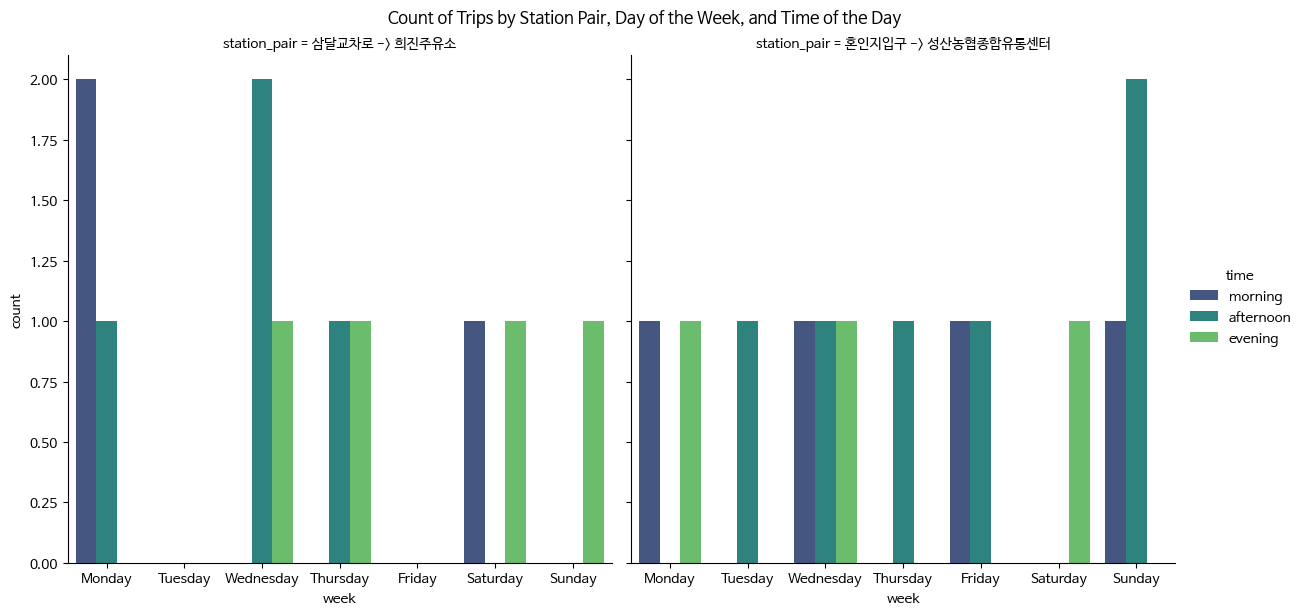

In [ ]:
# 201-12번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_201_12 = count_201_12[count_201_12['count']>=10]
over75_201_12 = pd.merge(df201_12, over75_201_12, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_201_12['station_pair'] = over75_201_12['now_station'] + ' -> ' + over75_201_12['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_201_12 = over75_201_12.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_201_12['week'] = pd.Categorical(count_by_day_201_12['week'], categories=days_order, ordered=True)
count_by_day_201_12['time'] = pd.Categorical(count_by_day_201_12['time'], categories=times_order, ordered=True)
count_by_day_201_12 = count_by_day_201_12.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_201_12, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

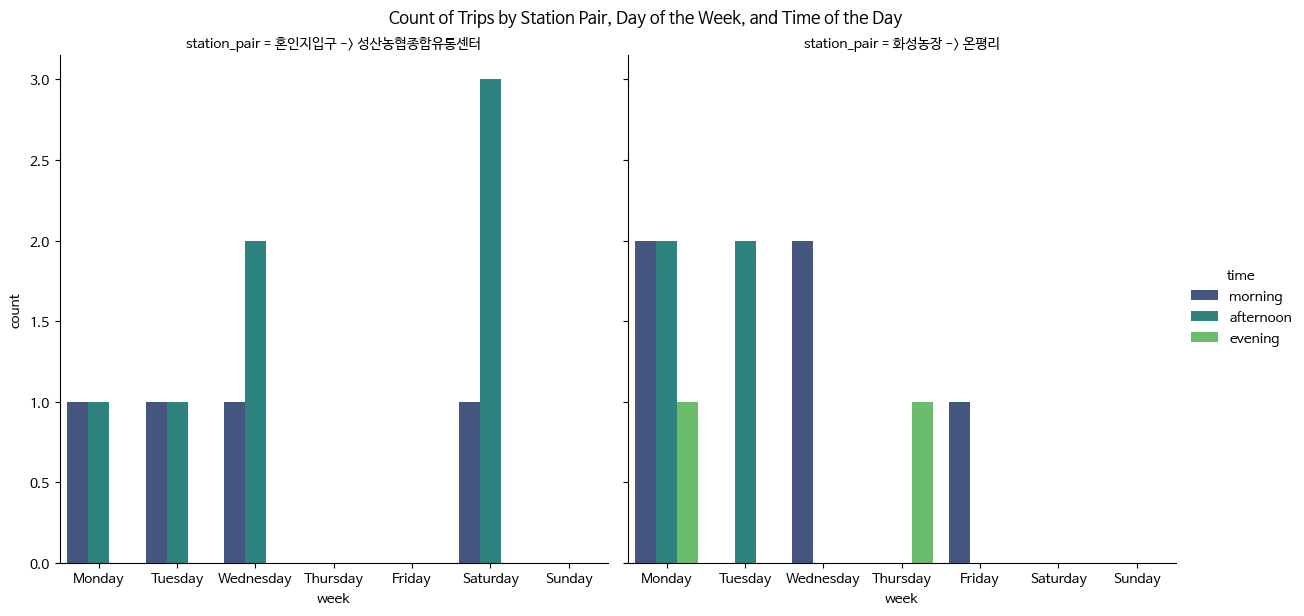

In [ ]:
# 201-14번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_201_14 = count_201_14[count_201_14['count']>=10]
over75_201_14 = pd.merge(df201_14, over75_201_14, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_201_14['station_pair'] = over75_201_14['now_station'] + ' -> ' + over75_201_14['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_201_14 = over75_201_14.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_201_14['week'] = pd.Categorical(count_by_day_201_14['week'], categories=days_order, ordered=True)
count_by_day_201_14['time'] = pd.Categorical(count_by_day_201_14['time'], categories=times_order, ordered=True)
count_by_day_201_14 = count_by_day_201_14.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_201_14, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

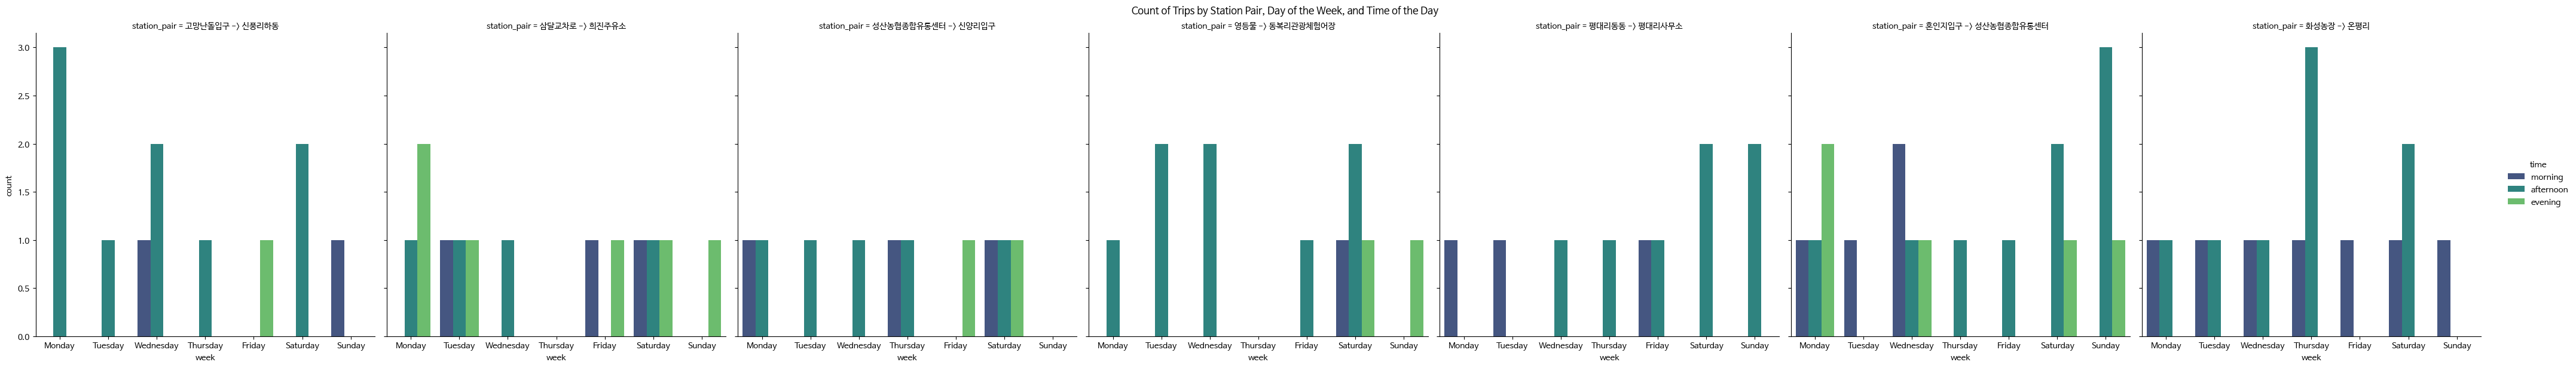

In [ ]:
# 201-16번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_201_16 = count_201_16[count_201_16['count']>=10]
over75_201_16 = pd.merge(df201_16, over75_201_16, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_201_16['station_pair'] = over75_201_16['now_station'] + ' -> ' + over75_201_16['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_201_16 = over75_201_16.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_201_16['week'] = pd.Categorical(count_by_day_201_16['week'], categories=days_order, ordered=True)
count_by_day_201_16['time'] = pd.Categorical(count_by_day_201_16['time'], categories=times_order, ordered=True)
count_by_day_201_16 = count_by_day_201_16.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_201_16, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

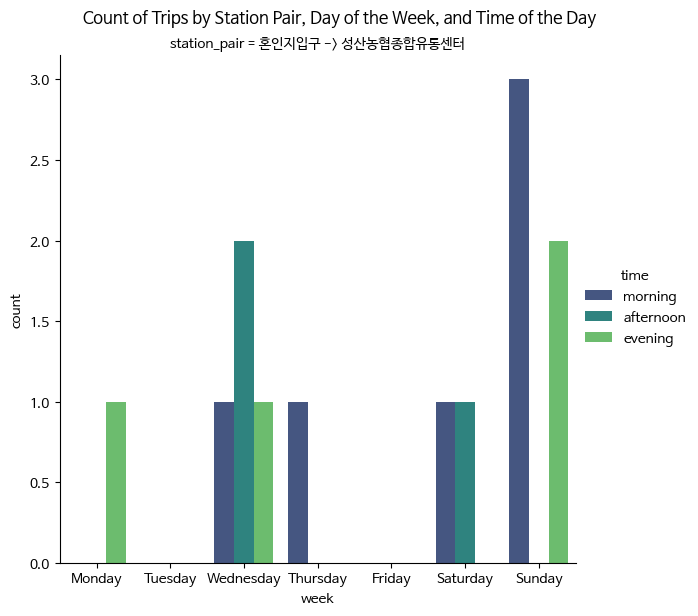

In [ ]:
# 201-22번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_201_22 = count_201_22[count_201_22['count']>=10]
over75_201_22 = pd.merge(df201_22, over75_201_22, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_201_22['station_pair'] = over75_201_22['now_station'] + ' -> ' + over75_201_22['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_201_22 = over75_201_22.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_201_22['week'] = pd.Categorical(count_by_day_201_22['week'], categories=days_order, ordered=True)
count_by_day_201_22['time'] = pd.Categorical(count_by_day_201_22['time'], categories=times_order, ordered=True)
count_by_day_201_22 = count_by_day_201_22.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_201_22, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

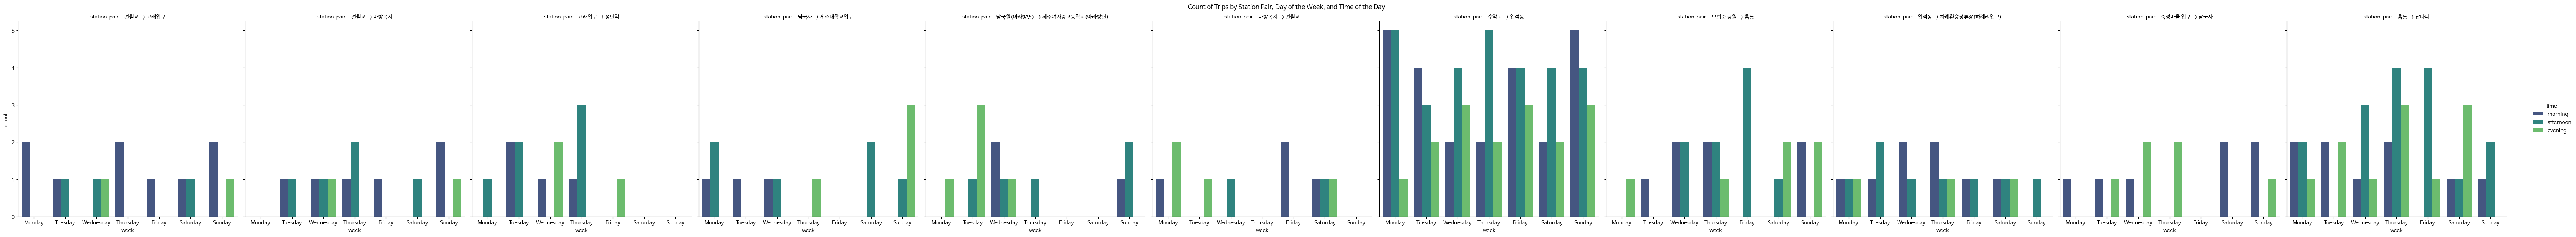

In [ ]:
# 281-1번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_281_1 = count_281_1[count_281_1['count']>=10]
over75_281_1 = pd.merge(df281_1, over75_281_1, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_281_1['station_pair'] = over75_281_1['now_station'] + ' -> ' + over75_281_1['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_281_1 = over75_281_1.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_281_1['week'] = pd.Categorical(count_by_day_281_1['week'], categories=days_order, ordered=True)
count_by_day_281_1['time'] = pd.Categorical(count_by_day_281_1['time'], categories=times_order, ordered=True)
count_by_day_281_1 = count_by_day_281_1.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_281_1, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

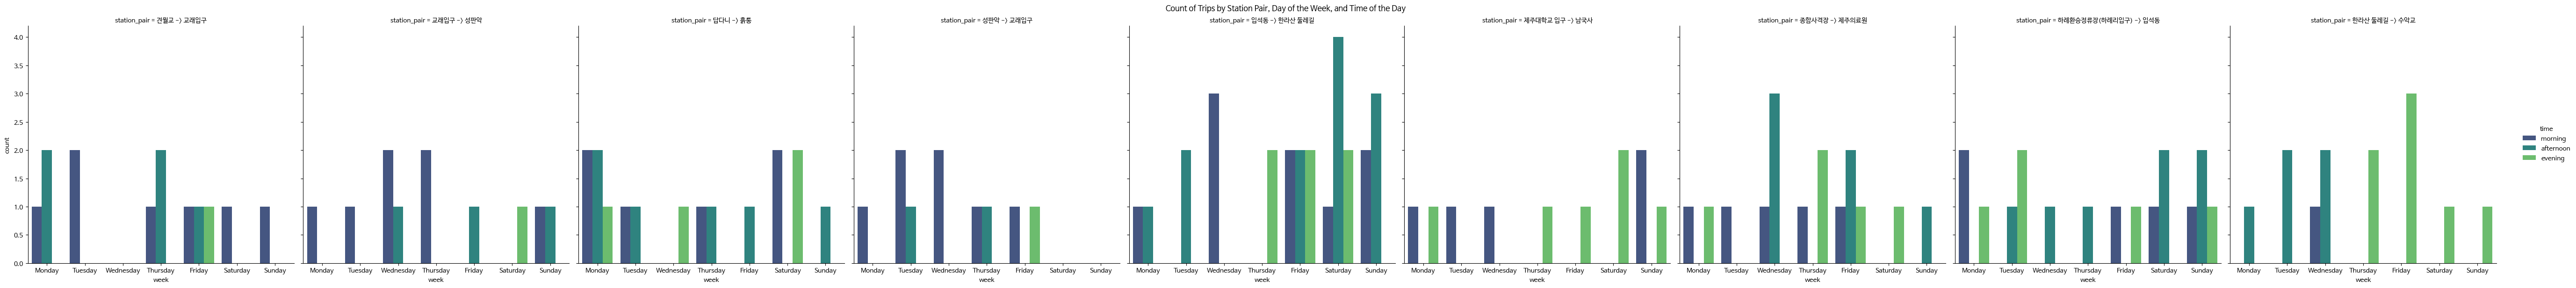

In [ ]:
# 281-2번의 count 10 이상 정류장의 요일별&시간대별 카운트의 시각화

over75_281_2 = count_281_2[count_281_2['count']>=10]
over75_281_2 = pd.merge(df281_2, over75_281_2, on = ['now_station', 'next_station'], how='inner')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# station_pair 열 추가
over75_281_2['station_pair'] = over75_281_2['now_station'] + ' -> ' + over75_281_2['next_station']

# 각 station_pair에 대한 요일별 데이터 수 계산
count_by_day_281_2 = over75_281_2.groupby(['station_pair', 'week','time'])['route_nm'].count().reset_index(name='count')

# 요일을 올바른 순서로 정렬
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_order = ['morning','afternoon','evening']
count_by_day_281_2['week'] = pd.Categorical(count_by_day_281_2['week'], categories=days_order, ordered=True)
count_by_day_281_2['time'] = pd.Categorical(count_by_day_281_2['time'], categories=times_order, ordered=True)
count_by_day_281_2 = count_by_day_281_2.sort_values(['station_pair', 'week','time'])


plt.figure(figsize=(15, 10))
sns.catplot(x='week', y='count', hue='time', col='station_pair', data=count_by_day_281_2, kind='bar', palette='viridis', height=6, aspect=1)
plt.suptitle('Count of Trips by Station Pair, Day of the Week, and Time of the Day', y=1.02)
plt.show()


<Axes: xlabel='week', ylabel='m/s'>

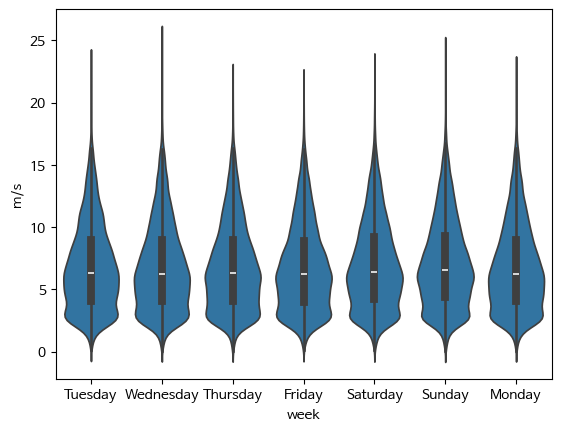

In [ ]:
sns.violinplot(x='week',y='m/s', data = df)

<Axes: xlabel='time', ylabel='m/s'>

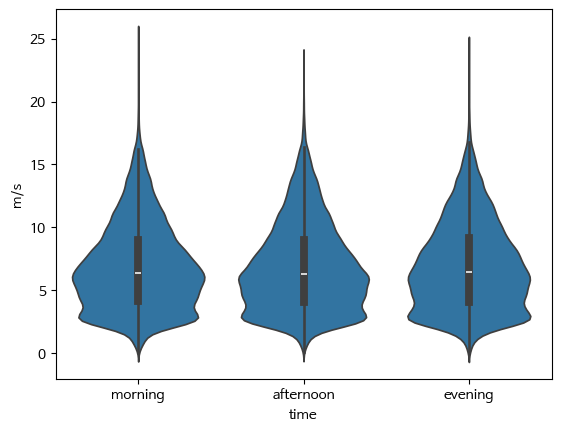

In [ ]:
sns.violinplot(x='time',y='m/s', data = df)

In [ ]:
df= df[df['m/s']< q]
df

,id,date,route_id,vh_id,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,week,s/m,m/s,time
0,0,2019-10-15,405136001,7997025,360-1,제주대학교입구,06시,266.000000,제대마을,24,Tuesday,0.090226,11.083333,morning
1,1,2019-10-15,405136001,7997025,360-1,제대마을,06시,333.265436,제대아파트,36,Tuesday,0.108108,9.250000,morning
2,2,2019-10-15,405136001,7997025,360-1,제대아파트,06시,420.903308,제주대학교,40,Tuesday,0.096386,10.375000,morning
3,3,2019-10-15,405136001,7997025,360-1,남국원(아라방면),06시,578.000000,제주여자중고등학교(아라방면),42,Tuesday,0.072664,13.761905,morning
4,4,2019-10-15,405136001,7997025,360-1,도호동,07시,322.581998,은남동,64,Tuesday,0.171123,5.843750,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209809,210452,2019-10-28,405328102,7983486,281-2,비석거리,21시,526.655462,삼아아파트,96,Monday,0.181818,5.500000,evening
209810,210453,2019-10-28,405328102,7983486,281-2,동문로터리,21시,280.000000,매일올레시장 7번입구,50,Monday,0.178571,5.600000,evening
209811,210454,2019-10-28,405328102,7983486,281-2,서귀포시 구 버스터미널,21시,114.000000,아랑조을거리 입구,16,Monday,0.140351,7.125000,evening
209812,210455,2019-10-28,405328102,7983486,281-2,아랑조을거리 입구,21시,219.256538,평생학습관,38,Monday,0.170404,5.868421,evening


In [ ]:
df.to_csv('df_ver2.csv')

# 데이터 분석 결과

- 전체 이상치 데이터의 count값의 75% 인 count 10 으로 이상치 분석을 실시
- 이상치로 잡힌 20개의 노선 중 6개 노선으로 압축
- 6개 노선에 대한 전체 count값의 75%인 count 10으로 이상치 분석을 실시
- 6개 노선에서 요일별&시간대별에 패턴이 없었으며, 눈에 띌 만한 특징이 없었다
- 또한 전체 outlier의 규모 또한, 전체 데이터에 영향을 줄 정도로 크지 않았기 때문에 모든 outlier 데이터를 날리기로 하였다